In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
# fetch data 

# mco_syr_sw_data = pd.read_csv('flight_data\mco_syr_sw_22_23.csv')
# mco_syr_jb_data = pd.read_csv('flight_data\mco_syr_jb_22_23.csv')
# jfk_syr_jb_data = pd.read_csv('flight_data\jfk_syr_jb_22_23.csv')
# jfk_syr_end_data = pd.read_csv('flight_data\jfk_syr_end_22_23.csv')
# ord_syr_ua_data = pd.read_csv('flight_data\ord_syr_ua_22_23.csv')
# ord_syr_aa_data = pd.read_csv('flight_data\ord_syr_aa_22_23.csv')
# mco_syr_sw_data.head()
# mco_syr_jb_data.head()
# jfk_syr_jb_data.head()
# jfk_syr_end_data.head()
# ord_syr_ua_data.head()
# ord_syr_aa_data.head()
mco_syr_sw_data = pd.read_csv('flight_data/mco_syr_sw_combined.csv')
mco_syr_jb_data = pd.read_csv('flight_data/mco_syr_jb_combined.csv')
jfk_syr_jb_data = pd.read_csv('flight_data/jfk_syr_jb_combined.csv')
jfk_syr_end_data = pd.read_csv('flight_data/jfk_syr_dl_combined.csv')
ord_syr_ua_data = pd.read_csv('flight_data/ord_syr_ua_combined.csv')
ord_syr_aa_data = pd.read_csv('flight_data/ord_syr_aa_combined.csv')
# mco_syr_sw_data = pd.read_csv('flight_data\mco_syr_sw_20_21_22_23_new.csv')
# mco_syr_jb_data = pd.read_csv('flight_data\mco_syr_jb_20_21_22_23.csv')
# jfk_syr_jb_data = pd.read_csv('flight_data\jfk_syr_jb_20_21_22_23.csv')
# jfk_syr_dl_data = pd.read_csv('flight_data\jfk_syr_dl_20_21_22_23.csv')
# ord_syr_ua_data = pd.read_csv('flight_data\ord_syr_ua_20_21_22_23.csv')
# ord_syr_aa_data = pd.read_csv('flight_data\ord_syr_aa_20_21_22_23.csv')

In [3]:
dfs = [ord_syr_aa_data,ord_syr_ua_data,jfk_syr_end_data,jfk_syr_jb_data,mco_syr_jb_data,mco_syr_sw_data]
main_data = pd.concat(dfs,axis = 0)
main_data.head()
len(main_data)

,Unnamed: 0,Carrier_Code,Date,Flight_Number,Tail_Number,Destination_Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),...,Wheels-on Time,Taxi-In time (Minutes),arr_Delay_Carrier,arr_Delay_Weather,arr_Delay_National_Aviation_System,arr_Delay_Security,arr_Delay_Late_Aircraft_Arrival,arr_hour,arr_day,arr_year
0,0,MQ,2020-01-04,"3,580.00",N240NN,SYR,7:55,8:21,112.00,87.00,...,10:43,5.00,0.00,0.00,0.00,0.00,0.00,10,5,2020
1,1,MQ,2020-01-11,"3,946.00",N247NN,SYR,15:00,15:09,108.00,132.00,...,18:13,8.00,9.00,0.00,24.00,0.00,0.00,17,5,2020
2,2,MQ,2020-01-18,"3,946.00",N265NN,SYR,15:00,16:27,108.00,147.00,...,19:45,9.00,0.00,4.00,39.00,0.00,83.00,17,5,2020
3,3,MQ,2020-01-25,"3,946.00",N281NN,SYR,15:00,14:55,108.00,126.00,...,17:56,5.00,0.00,0.00,0.00,0.00,0.00,17,5,2020
4,4,MQ,2020-02-01,"3,946.00",N283NN,SYR,15:00,14:57,108.00,99.00,...,17:32,4.00,0.00,0.00,0.00,0.00,0.00,17,5,2020


8661

In [4]:
main_data.isna().sum()

Unnamed: 0                             0
Carrier_Code                           0
Date                                   0
Flight_Number                          0
Tail_Number                           74
Destination_Airport                    0
Scheduled departure time               0
Actual departure time                  0
Scheduled elapsed time (Minutes)       0
Actual elapsed time (Minutes)          0
Departure delay (Minutes)              0
Wheels-off time                        0
Taxi-Out time (Minutes)                0
dep_Delay_Carrier                      0
dep_Delay_Weather                      0
dep_Delay_National_Aviation_System     0
dep_Delay_Security                     0
dep_Delay_Late_Aircraft_Arrival        0
dep_hour                               0
dep_day                                0
dep_year                               0
dep_order                              0
Origin_Airport                         0
Scheduled Arrival Time                 0
Actual Arrival T

In [5]:
main_data.dtypes



Unnamed: 0                              int64
Carrier_Code                           object
Date                                   object
Flight_Number                         float64
Tail_Number                            object
Destination_Airport                    object
Scheduled departure time               object
Actual departure time                  object
Scheduled elapsed time (Minutes)      float64
Actual elapsed time (Minutes)         float64
Departure delay (Minutes)             float64
Wheels-off time                        object
Taxi-Out time (Minutes)               float64
dep_Delay_Carrier                     float64
dep_Delay_Weather                     float64
dep_Delay_National_Aviation_System    float64
dep_Delay_Security                    float64
dep_Delay_Late_Aircraft_Arrival       float64
dep_hour                                int64
dep_day                                 int64
dep_year                                int64
dep_order                         

In [6]:
sub_data = main_data.drop(columns = ['Unnamed: 0','Destination_Airport','Actual departure time','Scheduled elapsed time (Minutes)','Actual elapsed time (Minutes)',
                         'Wheels-off time','Taxi-Out time (Minutes)','dep_Delay_Carrier',
                         'dep_Delay_Weather','dep_Delay_National_Aviation_System','dep_Delay_Security','dep_Delay_Late_Aircraft_Arrival',
                         'dep_year','Actual Arrival Time','Wheels-on Time','Taxi-In time (Minutes)','arr_Delay_Carrier','arr_Delay_Weather',
                         'arr_Delay_National_Aviation_System','arr_Delay_Security','arr_Delay_Late_Aircraft_Arrival','arr_year'])

In [7]:
sub_data.dtypes


Carrier_Code                  object
Date                          object
Flight_Number                float64
Tail_Number                   object
Scheduled departure time      object
Departure delay (Minutes)    float64
dep_hour                       int64
dep_day                        int64
dep_order                     object
Origin_Airport                object
Scheduled Arrival Time        object
Arrival Delay (Minutes)      float64
arr_hour                       int64
arr_day                        int64
dtype: object

In [8]:
sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,Scheduled Arrival Time,Arrival Delay (Minutes),arr_hour,arr_day
0,MQ,2020-01-04,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,10:47,1.00,10,5
1,MQ,2020-01-11,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,17:48,33.00,17,5
2,MQ,2020-01-18,"3,946.00",N265NN,15:00,87.00,15,5,latter,ORD,17:48,126.00,17,5
3,MQ,2020-01-25,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,17:48,13.00,17,5
4,MQ,2020-02-01,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,17:48,-12.00,17,5


In [9]:
sub_data['dep_min'] = sub_data['Scheduled departure time'].str.split(":").str[1].astype('int64')
# def round_to_nearest_quarter(minute):
#     if 0 <= minute < 14:
#         return 0
#     elif 15 <= minute < 29:
#         return 15
#     elif 30 <= minute < 44:
#         return 30
#     else:
#         return 45
sub_data['Date'] = pd.to_datetime( sub_data['Date'],format ="%Y-%m-%d")
sub_data['Date'] = sub_data['Date'].dt.strftime('%m/%d/%Y')
sub_data['dep_minutes'] = 0
sub_data['dep_minutes'] = sub_data['dep_minutes'].astype('object')
sub_data['dep_hours'] = sub_data['dep_hour'].astype('object')
sub_data['dep_min'] = sub_data['dep_min'].astype('object')
sub_data['arr_min'] = main_data['Scheduled Arrival Time'].str.split(":").str[1].astype('int64')
sub_data['arr_minutes'] = 0
sub_data['arr_minutes'] = sub_data['arr_minutes'].astype('object')
sub_data['arr_hours'] = sub_data['arr_hour'].astype('object')
sub_data['arr_min'] = sub_data['arr_min'].astype('object')
sub_data['Flight_Number'] = main_data['Flight_Number'].astype('object')
sub_data['dep_hour'] = main_data['dep_hour'].astype('object')
sub_data['dep_day'] = main_data['dep_day'].astype('object')
sub_data['arr_hour'] = main_data['arr_hour'].astype('object')
sub_data['arr_day'] = main_data['arr_day'].astype('object')
conditions = [
    (sub_data['Arrival Delay (Minutes)'] > 5),
    (sub_data['Arrival Delay (Minutes)'] >=-5) & (sub_data['Arrival Delay (Minutes)'] <= 5),
    (sub_data['Arrival Delay (Minutes)'] < -5)
]
conditions2 = [
    (sub_data['Departure delay (Minutes)'] > 5),
    (sub_data['Departure delay (Minutes)'] >=-5) & (sub_data['Departure delay (Minutes)'] <= 5),
    (sub_data['Departure delay (Minutes)'] < -5)
]
choices = [2,1,0]
sub_data['arr_status'] = np.select(conditions, choices)
sub_data['dep_status'] = np.select(conditions2, choices)
sub_data.dtypes
sub_data.head()
len(sub_data)

Carrier_Code                  object
Date                          object
Flight_Number                 object
Tail_Number                   object
Scheduled departure time      object
Departure delay (Minutes)    float64
dep_hour                      object
dep_day                       object
dep_order                     object
Origin_Airport                object
Scheduled Arrival Time        object
Arrival Delay (Minutes)      float64
arr_hour                      object
arr_day                       object
dep_min                       object
dep_minutes                   object
dep_hours                     object
arr_min                       object
arr_minutes                   object
arr_hours                     object
arr_status                     int32
dep_status                     int32
dtype: object

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,arr_hour,arr_day,dep_min,dep_minutes,dep_hours,arr_min,arr_minutes,arr_hours,arr_status,dep_status
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,...,10,5,55,0,7,47,0,10,1,2
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,...,17,5,0,0,15,48,0,17,2,2
2,MQ,01/18/2020,"3,946.00",N265NN,15:00,87.00,15,5,latter,ORD,...,17,5,0,0,15,48,0,17,2,2
3,MQ,01/25/2020,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,...,17,5,0,0,15,48,0,17,2,1
4,MQ,02/01/2020,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,...,17,5,0,0,15,48,0,17,0,1


8661

In [10]:
#sub_data.to_csv('sub_data.csv', index=False)

In [11]:
len(sub_data)
sub_data= sub_data[sub_data['Arrival Delay (Minutes)'] < 120]
len(sub_data)

8661

8405

In [12]:
# Read and process weather data files for each airport
jfk_weather_data = pd.read_csv('weather_data/JFK_weather_data_hourly_processed.csv')
syr_weather_data = pd.read_csv('weather_data/SYR_weather_data_hourly_processed.csv')
ord_weather_data = pd.read_csv('weather_data/ORD_weather_data_hourly_processed.csv')
mco_weather_data = pd.read_csv('weather_data/MCO_weather_data_hourly_processed.csv')

# Combine weather data for all airports
weather_dfs = [jfk_weather_data, ord_weather_data, mco_weather_data]
weather_data = pd.concat(weather_dfs, axis=0)
#weather_data['dep_minutes'] = weather_data['dep_minutes'].astype('object')
weather_data['dep_hours'] = weather_data['dep_hours'].astype('object')
#syr_weather_data['arr_minutes'] = syr_weather_data['arr_minutes'].astype('object')
syr_weather_data['arr_hours'] = syr_weather_data['arr_hours'].astype('object')
weather_data.head()
syr_weather_data.head()
weather_data.dtypes
syr_weather_data.dtypes




,dep_azimuth,dep_clouds,dep_dewpt,dep_elev_angle,dep_h_angle,dep_precip,dep_pres,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd,Date,dep_hours,Origin_Airport
0,261.20,100,3.80,-26.20,NaN,0.00,1002,final,88,0.00,5.60,16,Overcast clouds,804,220,6.00,3.60,12/31/2019,19,JFK
1,270.50,100,3.90,-37.50,NaN,0.25,1003,final,85,0.00,6.30,16,Overcast clouds,804,220,6.80,5.37,12/31/2019,20,JFK
2,281.40,100,3.70,-48.80,NaN,0.00,1003,final,82,0.00,6.50,16,Overcast clouds,804,255,8.00,7.45,12/31/2019,21,JFK
3,296.30,100,1.60,-59.60,NaN,0.00,1002,final,73,0.00,6.10,16,Overcast clouds,804,270,9.30,6.70,12/31/2019,22,JFK
4,320.80,100,0.70,-68.60,NaN,0.00,1003,final,69,0.00,6.00,16,Overcast clouds,804,270,10.40,7.45,12/31/2019,23,JFK


,arr_azimuth,arr_clouds,arr_dewpt,arr_elev_angle,arr_h_angle,arr_precip,arr_pres,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd,Date,arr_hours
0,260.90,100,-2.30,-24.90,NaN,0.00,987,final,78,0.00,1.10,14,Overcast clouds,804,240,9.60,4.59,12/31/2019,19
1,270.70,100,-3.00,-35.80,NaN,0.00,987,final,77,0.00,0.60,16,Overcast clouds,804,240,9.60,4.59,12/31/2019,20
2,282.10,100,-4.00,-46.60,NaN,0.00,986,final,71,0.00,0.60,16,Overcast clouds,804,240,10.40,5.70,12/31/2019,21
3,297.00,100,-4.40,-56.90,NaN,0.00,987,final,69,0.00,0.60,16,Overcast clouds,804,250,10.40,6.20,12/31/2019,22
4,319.80,100,-4.40,-65.60,NaN,0.00,986,final,69,0.00,0.60,14,Overcast clouds,804,250,10.80,6.20,12/31/2019,23


dep_azimuth                float64
dep_clouds                   int64
dep_dewpt                  float64
dep_elev_angle             float64
dep_h_angle                float64
dep_precip                 float64
dep_pres                     int64
dep_revision_status         object
dep_rh                       int64
dep_snow                   float64
dep_temp                   float64
dep_vis                      int64
dep_weather.description     object
dep_weather.code             int64
dep_wind_dir                 int64
dep_wind_gust_spd          float64
dep_wind_spd               float64
Date                        object
dep_hours                   object
Origin_Airport              object
dtype: object

arr_azimuth                float64
arr_clouds                   int64
arr_dewpt                  float64
arr_elev_angle             float64
arr_h_angle                float64
arr_precip                 float64
arr_pres                     int64
arr_revision_status         object
arr_rh                       int64
arr_snow                   float64
arr_temp                   float64
arr_vis                      int64
arr_weather.description     object
arr_weather.code             int64
arr_wind_dir                 int64
arr_wind_gust_spd          float64
arr_wind_spd               float64
Date                        object
arr_hours                   object
dtype: object

In [13]:
sub_data = pd.merge(sub_data, weather_data, how='left', on=['Origin_Airport', 'Date', 'dep_hours'])


sub_data.head()

,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,dep_revision_status,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.description,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,...,final,88,0.00,-1.10,11,Overcast clouds,804,320,6.80,3.10
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,...,final,96,8.50,-0.60,2,Light snow,600,20,15.90,10.80
2,MQ,01/25/2020,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,...,final,92,4.00,0.80,6,Light snow,600,255,8.20,4.34
3,MQ,02/01/2020,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,...,final,73,0.00,2.40,16,Overcast clouds,804,255,10.40,5.37
4,MQ,02/08/2020,"3,946.00",N274NN,15:00,-4.00,15,5,latter,ORD,...,final,56,0.00,1.60,16,Overcast clouds,804,235,7.60,3.85


In [14]:
# Define merging logic based on airport code
sub_data = pd.merge(sub_data, syr_weather_data, how='left', on=['Date', 'arr_hours'])
sub_data.head()



,Carrier_Code,Date,Flight_Number,Tail_Number,Scheduled departure time,Departure delay (Minutes),dep_hour,dep_day,dep_order,Origin_Airport,...,arr_revision_status,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.description,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,MQ,01/04/2020,"3,580.00",N240NN,7:55,26.00,7,5,latter,ORD,...,final,92,0.00,2.80,6,Light rain,500,350,5.09,5.09
1,MQ,01/11/2020,"3,946.00",N247NN,15:00,9.00,15,5,latter,ORD,...,final,83,0.00,15.00,16,Light rain,500,150,11.50,2.10
2,MQ,01/25/2020,"3,946.00",N281NN,15:00,-5.00,15,5,latter,ORD,...,final,96,1.50,1.10,3,Sleet,611,110,2.60,2.60
3,MQ,02/01/2020,"3,946.00",N283NN,15:00,-3.00,15,5,latter,ORD,...,final,75,0.00,0.00,16,Overcast clouds,804,245,1.60,0.80
4,MQ,02/08/2020,"3,946.00",N274NN,15:00,-4.00,15,5,latter,ORD,...,final,64,0.00,-8.90,16,Overcast clouds,804,245,2.80,1.20


In [15]:
sub_data.isna().sum()

Carrier_Code                    0
Date                            0
Flight_Number                   0
Tail_Number                    74
Scheduled departure time        0
Departure delay (Minutes)       0
dep_hour                        0
dep_day                         0
dep_order                       0
Origin_Airport                  0
Scheduled Arrival Time          0
Arrival Delay (Minutes)         0
arr_hour                        0
arr_day                         0
dep_min                         0
dep_minutes                     0
dep_hours                       0
arr_min                         0
arr_minutes                     0
arr_hours                       0
arr_status                      0
dep_status                      0
dep_azimuth                     0
dep_clouds                      0
dep_dewpt                       0
dep_elev_angle                  0
dep_h_angle                  8405
dep_precip                      0
dep_pres                        0
dep_revision_s

In [16]:
sub_data.columns

Index(['Carrier_Code', 'Date', 'Flight_Number', 'Tail_Number',
       'Scheduled departure time', 'Departure delay (Minutes)', 'dep_hour',
       'dep_day', 'dep_order', 'Origin_Airport', 'Scheduled Arrival Time',
       'Arrival Delay (Minutes)', 'arr_hour', 'arr_day', 'dep_min',
       'dep_minutes', 'dep_hours', 'arr_min', 'arr_minutes', 'arr_hours',
       'arr_status', 'dep_status', 'dep_azimuth', 'dep_clouds', 'dep_dewpt',
       'dep_elev_angle', 'dep_h_angle', 'dep_precip', 'dep_pres',
       'dep_revision_status', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.description', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd', 'arr_azimuth', 'arr_clouds',
       'arr_dewpt', 'arr_elev_angle', 'arr_h_angle', 'arr_precip', 'arr_pres',
       'arr_revision_status', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.description', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='o

In [17]:
# sub_data.to_csv('merged_data.csv', index=False)


In [18]:
#sub_data.rename(columns={'Arrival Delay (Minutes)':'arr_delay'}, inplace=True)


In [19]:
sub_data.drop(columns= ['Carrier_Code','Date','Flight_Number','Tail_Number','arr_azimuth',
                       'Scheduled departure time','Scheduled Arrival Time','dep_order', 
                        'arr_hours','arr_minutes', 'dep_hours', 'dep_minutes',
                        'arr_weather.description', 'dep_weather.description','Arrival Delay (Minutes)'
                        ,'Departure delay (Minutes)','arr_elev_angle','arr_h_angle','arr_revision_status',
                       'dep_elev_angle','dep_h_angle','dep_revision_status','dep_azimuth'],inplace = True)


In [20]:

sub_data.dtypes
sub_data.columns

sub_data.head()
sub_data.isna().sum()

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_status             int32
dep_status             int32
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres               int64
dep_rh                 int64
dep_snow             float64
dep_temp             float64
dep_vis                int64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres               int64
arr_rh                 int64
arr_snow             float64
arr_temp             float64
arr_vis                int64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dtype: object

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_status,dep_status,dep_clouds,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,7,5,ORD,10,5,55,47,1,2,100,...,1.50,991,92,0.00,2.80,6,500,350,5.09,5.09
1,15,5,ORD,17,5,0,48,2,2,100,...,1.50,994,83,0.00,15.00,16,500,150,11.50,2.10
2,15,5,ORD,17,5,0,48,2,1,100,...,1.50,994,96,1.50,1.10,3,611,110,2.60,2.60
3,15,5,ORD,17,5,0,48,0,1,100,...,0.00,994,75,0.00,0.00,16,804,245,1.60,0.80
4,15,5,ORD,17,5,0,48,0,1,100,...,0.00,1009,64,0.00,-8.90,16,804,245,2.80,1.20


dep_hour             0
dep_day              0
Origin_Airport       0
arr_hour             0
arr_day              0
dep_min              0
arr_min              0
arr_status           0
dep_status           0
dep_clouds           0
dep_dewpt            0
dep_precip           0
dep_pres             0
dep_rh               0
dep_snow             0
dep_temp             0
dep_vis              0
dep_weather.code     0
dep_wind_dir         0
dep_wind_gust_spd    0
dep_wind_spd         0
arr_clouds           0
arr_dewpt            0
arr_precip           0
arr_pres             0
arr_rh               0
arr_snow             0
arr_temp             0
arr_vis              0
arr_weather.code     0
arr_wind_dir         0
arr_wind_gust_spd    0
arr_wind_spd         0
dtype: int64

In [21]:
#sub_data.to_csv('merged_data.csv', index=False)


In [22]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')


<Axes: >

dep_hour


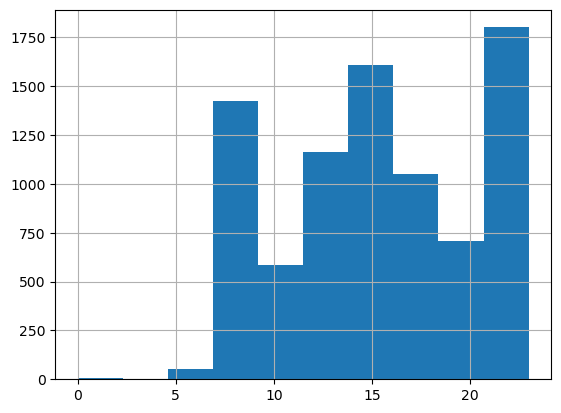

<Axes: >

dep_day


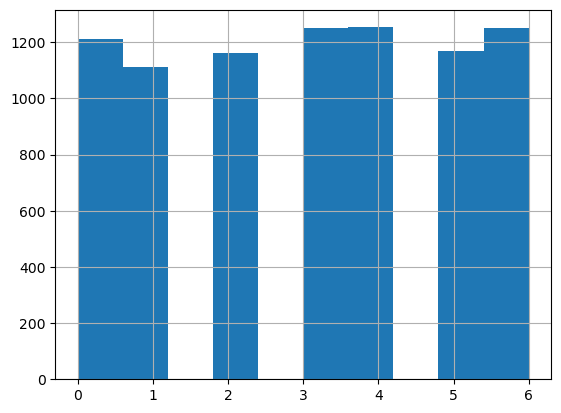

<Axes: >

Origin_Airport


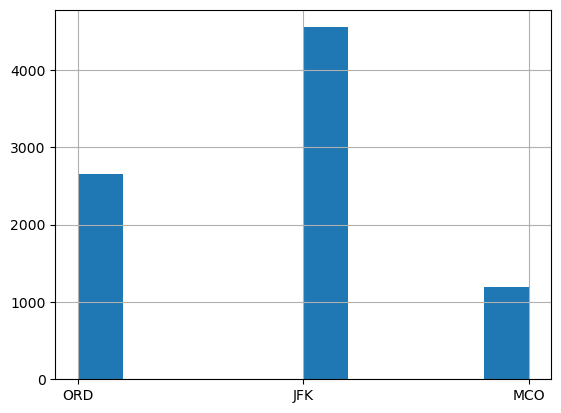

<Axes: >

arr_hour


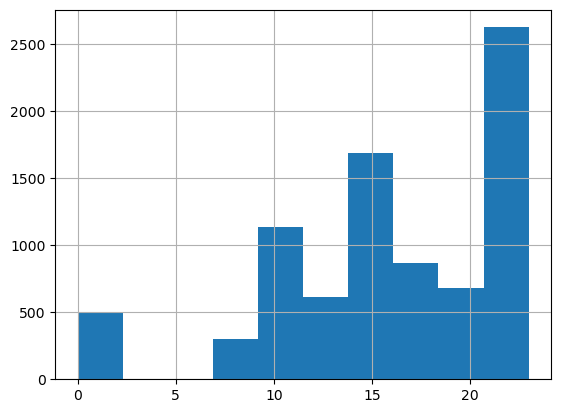

<Axes: >

arr_day


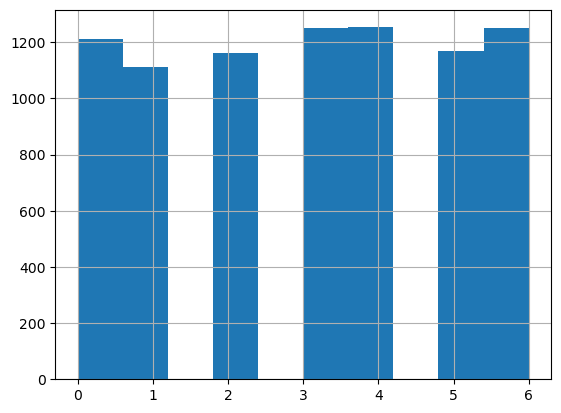

<Axes: >

dep_min


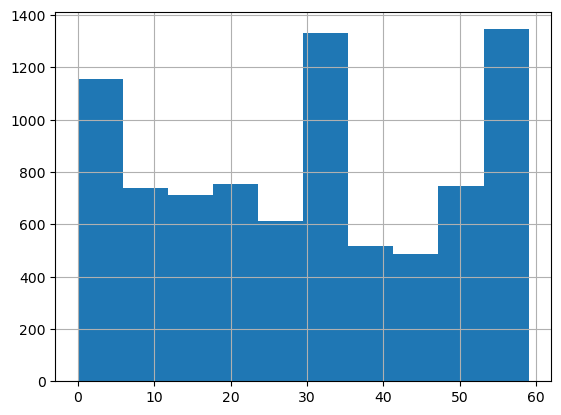

<Axes: >

arr_min


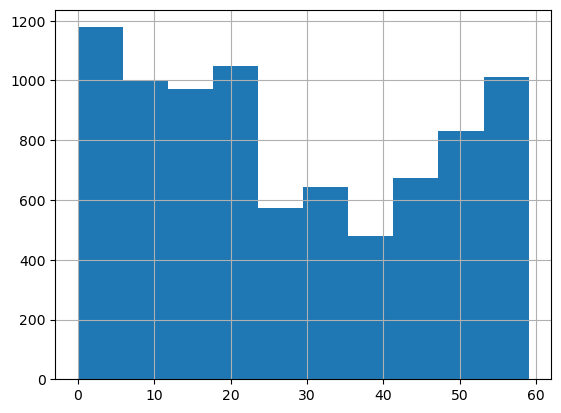

<Axes: >

arr_status


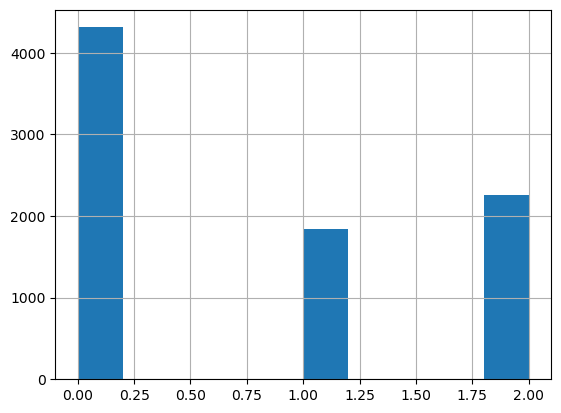

<Axes: >

dep_status


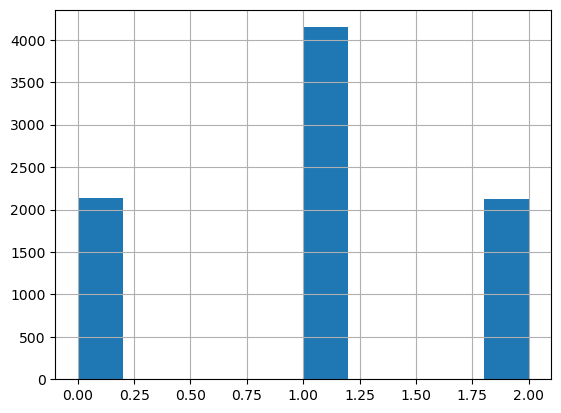

<Axes: >

dep_clouds


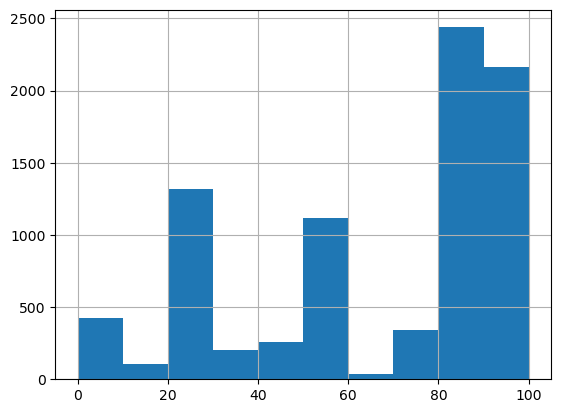

<Axes: >

dep_dewpt


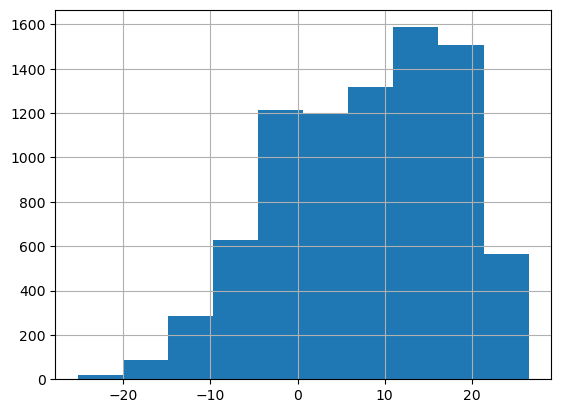

<Axes: >

dep_precip


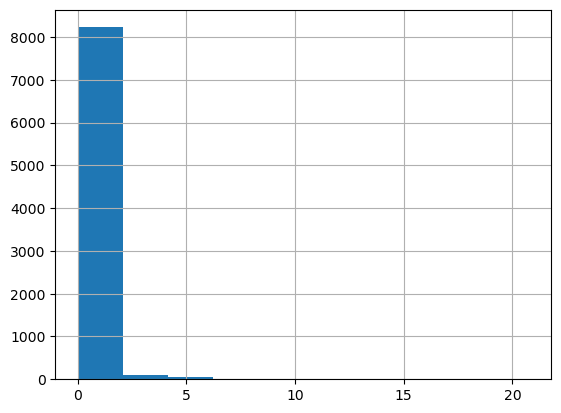

<Axes: >

dep_pres


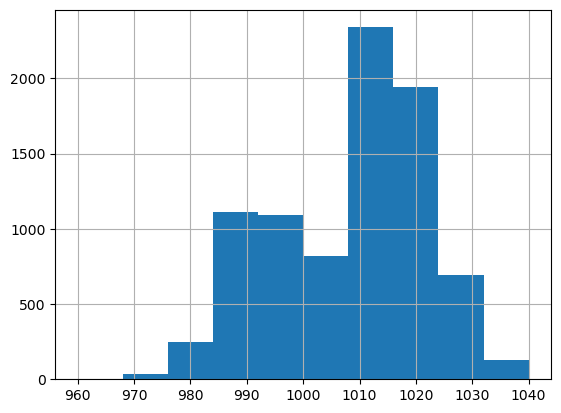

<Axes: >

dep_rh


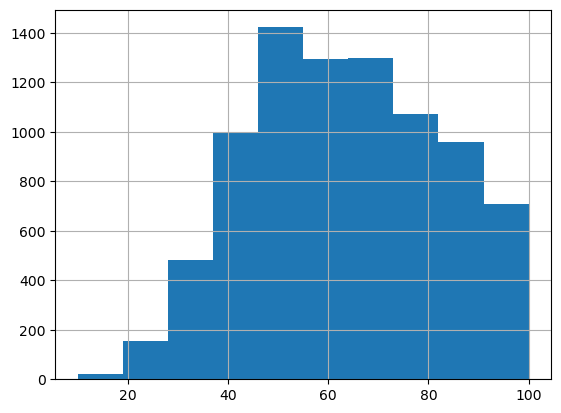

<Axes: >

dep_snow


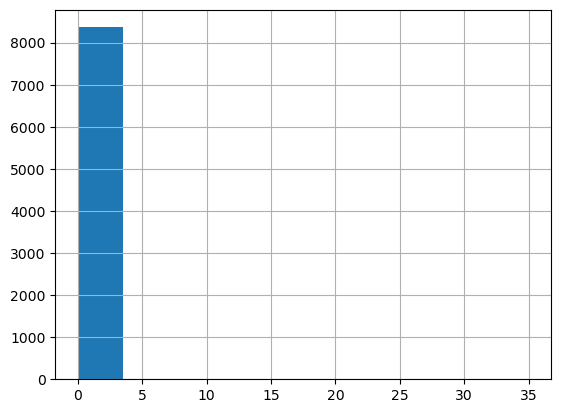

<Axes: >

dep_temp


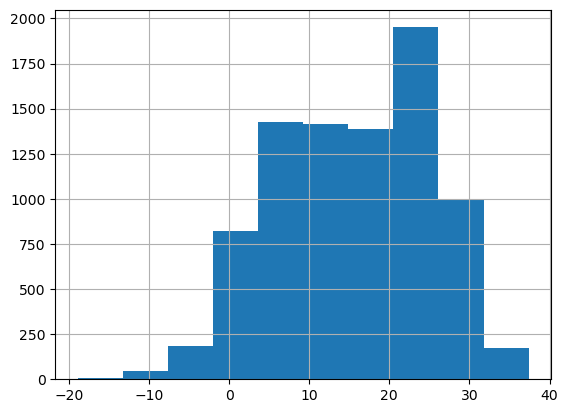

<Axes: >

dep_vis


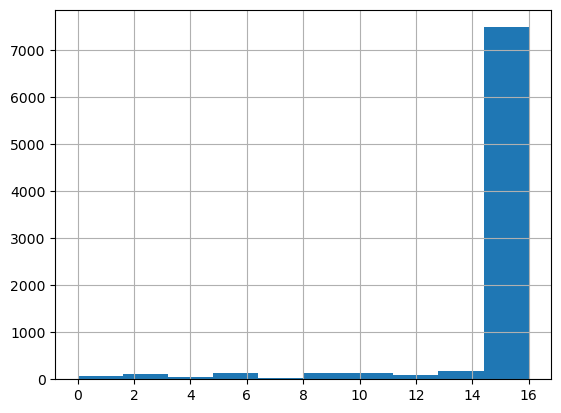

<Axes: >

dep_weather.code


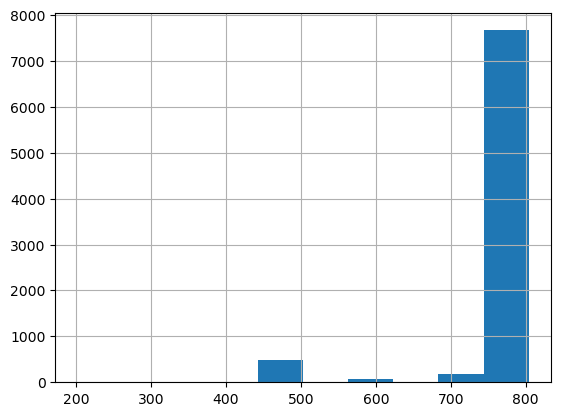

<Axes: >

dep_wind_dir


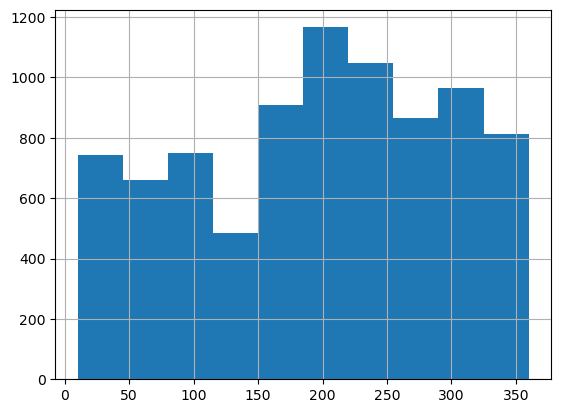

<Axes: >

dep_wind_gust_spd


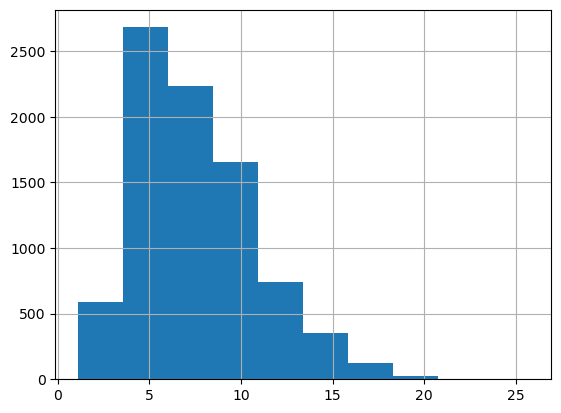

<Axes: >

dep_wind_spd


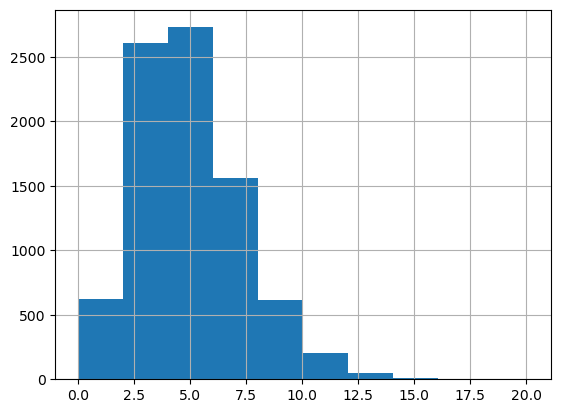

<Axes: >

arr_clouds


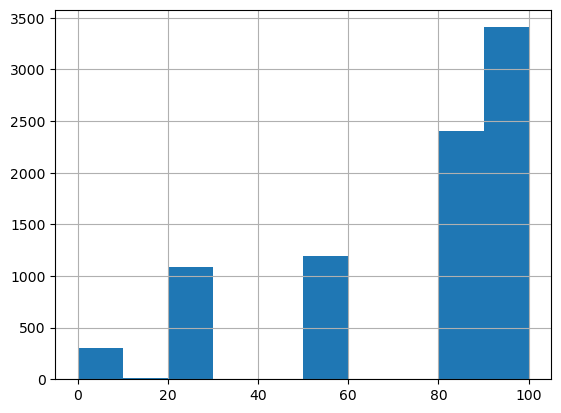

<Axes: >

arr_dewpt


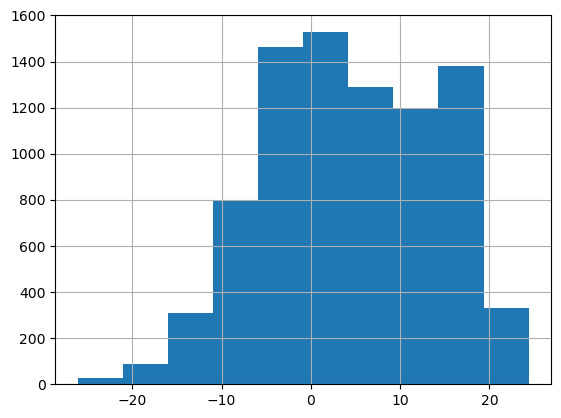

<Axes: >

arr_precip


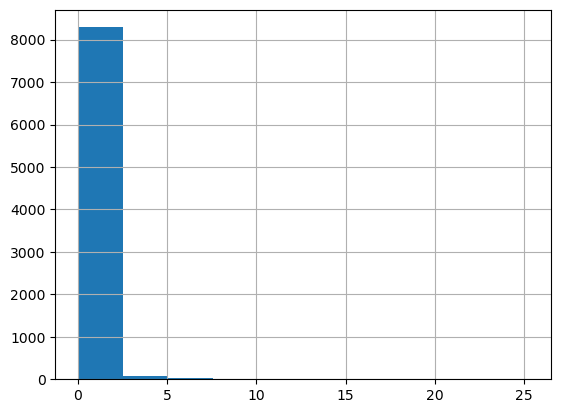

<Axes: >

arr_pres


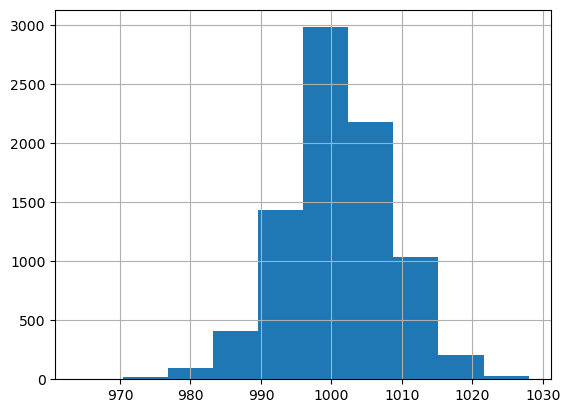

<Axes: >

arr_rh


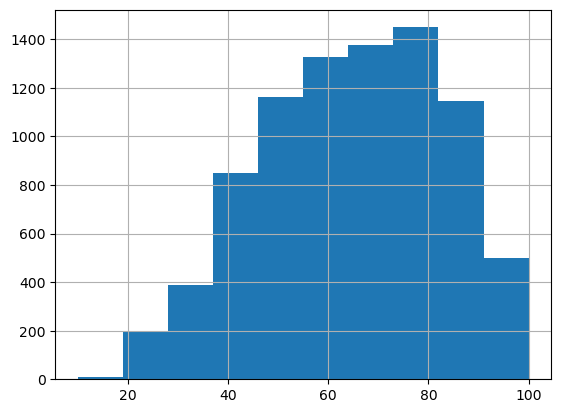

<Axes: >

arr_snow


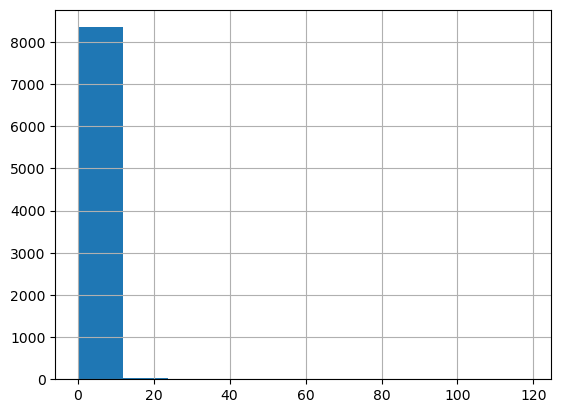

<Axes: >

arr_temp


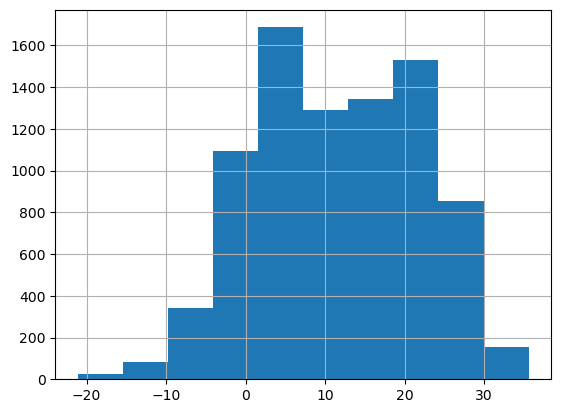

<Axes: >

arr_vis


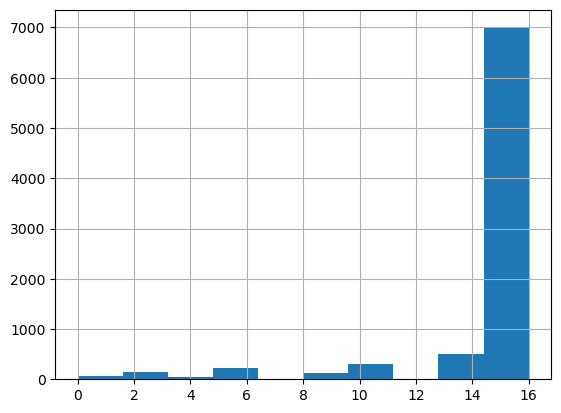

<Axes: >

arr_weather.code


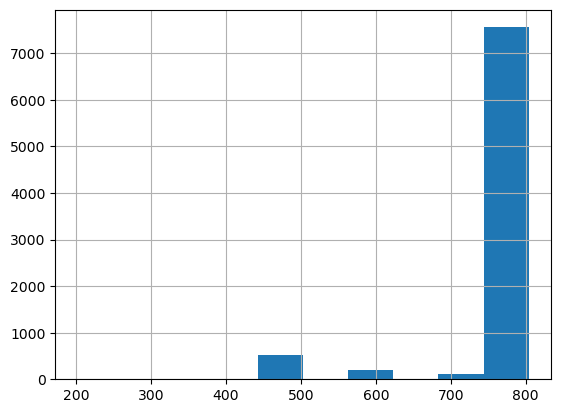

<Axes: >

arr_wind_dir


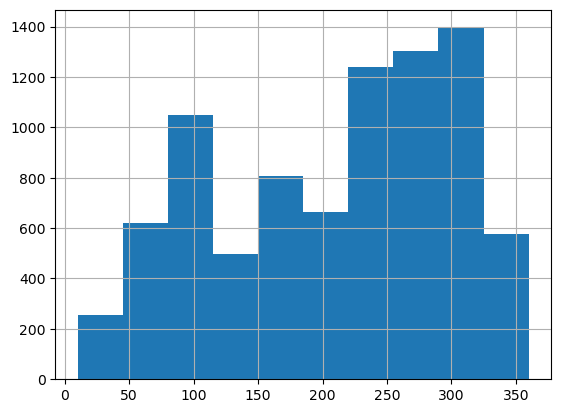

<Axes: >

arr_wind_gust_spd


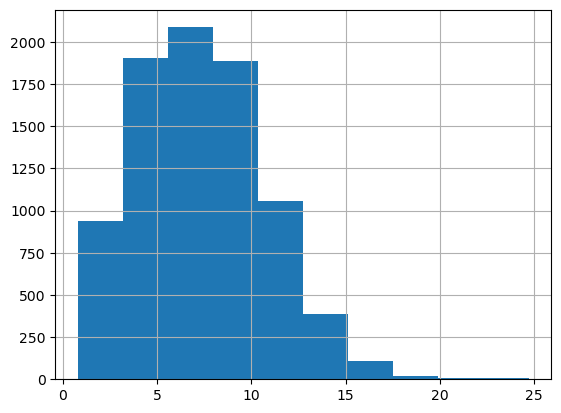

<Axes: >

arr_wind_spd


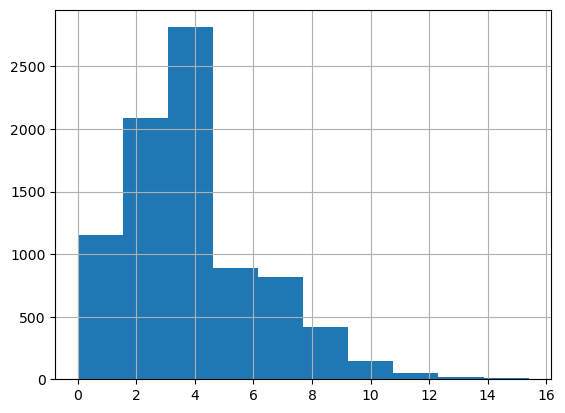

In [23]:
cols = sub_data.columns
print(cols)
for col in cols: 
    sub_data[col].hist()
    print(col)
    plt.show()

In [24]:
import plotly.express as px

In [25]:
sub_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [26]:
#for co in sub_data.columns:
fig = px.scatter(sub_data, y='dep_precip', x='dep_status', title='delay Over columns')
#fig.update_layout(height=1600, width=900, title_text="Stacked Subplots")
fig.show()

In [27]:
#sub_data['Carrier_Code'].unique()

In [28]:
# sub_data["Carrier_Code"] = np.where(sub_data["Carrier_Code"] == "MQ", "AA", sub_data["Carrier_Code"])
# sub_data["Carrier_Code"] = np.where(sub_data["Carrier_Code"] == "9E", "DL", sub_data["Carrier_Code"])

In [29]:
sub_data['Origin_Airport'].unique()

array(['ORD', 'JFK', 'MCO'], dtype=object)

In [30]:
su_data = sub_data
# su_data.head()
# sub_data.columns
su_data['dep_hour'] = pd.Categorical(su_data['dep_hour'], categories=[i for i in range(24)])
su_data['dep_day'] = pd.Categorical(su_data['dep_day'], categories=[i for i in range(7)])
su_data['dep_min'] = pd.Categorical(su_data['dep_min'], categories=[i for i in range(60)])
su_data['arr_hour'] = pd.Categorical(su_data['arr_hour'], categories=[i for i in range(24)])
su_data['arr_day'] = pd.Categorical(su_data['arr_day'], categories=[i for i in range(7)])
su_data['arr_min'] = pd.Categorical(su_data['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
su_data['Origin_Airport'] = pd.Categorical(su_data['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
su_data['arr_weather.code'] = pd.Categorical(su_data['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
su_data['dep_weather.code'] = pd.Categorical(su_data['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
#su_data['dep_status']= pd.Categorical(su_data['dep_status'], categories = [0,1,2])
#su_data.drop(columns=['arr_h_angle','dep_h_angle'],inplace = True)
su_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [31]:
su_data['dep_precip'] = su_data['dep_precip']**2
su_data['arr_precip'] = su_data['arr_precip']**2

In [32]:
# correl = subset_data.corr()
correl = su_data.corr(numeric_only=True)

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [33]:
# su_data.drop(columns=['arr_status'],inplace = True)
# su_data.columns

In [34]:
su_data.dtypes

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
arr_status              int32
dep_status              int32
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: obj

In [35]:
dep_data = su_data.drop(columns = ['arr_status'])

In [36]:
arr_data = su_data.drop(columns = ['dep_status'])

In [37]:
dep_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [38]:
dep_data = pd.get_dummies(dep_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
dep_data.head()
# su_data.dtypes
# su_data.columns

,dep_status,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,2,100,-2.80,0.00,989,88,0.00,-1.10,11,320,...,False,False,False,False,False,False,False,False,False,False
1,2,100,-1.20,0.25,985,96,8.50,-0.60,2,20,...,False,False,False,False,False,False,False,False,False,False
2,1,100,-0.30,0.25,985,92,4.00,0.80,6,255,...,False,False,False,False,False,False,False,False,False,False
3,1,100,-2.00,0.00,984,73,0.00,2.40,16,255,...,False,False,False,False,False,False,False,False,True,False
4,1,100,-6.30,0.00,995,56,0.00,1.60,16,235,...,False,False,False,False,False,False,False,False,True,False


In [39]:
X_train, X_test, y_train, y_test = train_test_split(dep_data.drop(columns = ['dep_status']), dep_data['dep_status'],stratify = dep_data['dep_status'], test_size=0.2, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train.dtypes
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
5135,25,-2.90,0.00,1009,45,0.00,8.30,16,290,15.00,...,False,False,False,False,False,False,False,False,True,False
1831,78,1.10,0.00,987,70,0.00,6.10,16,230,3.60,...,False,False,False,False,False,False,False,False,True,False
7746,50,4.70,0.00,1014,32,0.00,22.20,16,30,4.80,...,False,False,False,False,False,False,False,False,True,False
5034,43,-0.80,0.00,1025,44,0.00,11.00,16,320,6.80,...,False,False,False,False,False,False,False,False,True,False
1763,0,1.10,0.00,994,35,0.00,16.60,16,285,4.40,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,25,11.10,0.00,1020,55,0.00,20.40,16,290,2.97,...,False,False,False,False,False,False,True,False,False,False
1508,100,-24.50,0.00,985,61,0.00,-18.90,4,270,18.80,...,True,False,False,False,False,False,False,False,False,False
7410,87,20.80,0.25,1010,56,0.00,30.60,16,310,8.80,...,False,False,False,False,False,False,True,False,False,False
5188,25,3.30,0.00,1022,82,0.00,6.10,16,200,4.80,...,False,False,False,False,False,False,False,False,True,False


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
8306,87,20.90,0.00,1010,62,0.00,28.90,16,275,5.20,...,False,False,False,False,False,False,False,False,False,False
159,25,13.70,0.00,992,61,0.00,21.50,16,345,7.60,...,False,False,False,False,False,False,True,False,False,False
2785,87,-11.60,0.00,1028,35,0.00,2.20,16,310,6.80,...,False,False,False,False,False,False,False,False,True,False
7325,25,2.50,0.00,1023,36,0.00,17.80,16,50,11.30,...,False,False,False,False,False,False,True,False,False,False
63,43,11.90,0.00,989,72,0.00,17.00,16,245,4.00,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,100,10.20,2.25,1018,100,0.00,10.20,10,120,13.50,...,False,False,False,False,False,False,False,False,False,False
4818,25,15.10,0.00,1021,90,0.00,16.70,16,135,2.60,...,False,False,False,False,True,False,False,False,False,False
8175,100,15.90,0.00,1017,50,0.00,27.20,16,360,4.40,...,False,False,False,False,False,False,False,False,True,False
7587,50,13.00,0.00,1000,39,0.00,28.30,16,240,11.30,...,False,False,False,False,False,False,False,False,True,False


dtype('int32')

8306    1
159     0
2785    1
7325    2
63      1
       ..
5573    1
4818    2
8175    0
7587    1
2325    0
Name: dep_status, Length: 1681, dtype: int32

In [40]:
# y = X_train['arr_status']
# u = X_test['arr_status']
# X_train.drop(columns=['arr_status'], inplace=True)
# X_test.drop(columns=['arr_status'], inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
5135,-1.34,-1.08,-0.08,0.09,-0.95,-0.06,-0.75,0.31,0.98,2.25,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
1831,0.34,-0.68,-0.08,-1.54,0.37,-0.06,-0.98,0.31,0.36,-1.22,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
7746,-0.55,-0.32,-0.08,0.46,-1.64,-0.06,0.69,0.31,-1.68,-0.86,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
5034,-0.77,-0.87,-0.08,1.28,-1.00,-0.06,-0.47,0.31,1.29,-0.25,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
1763,-2.14,-0.68,-0.08,-1.02,-1.48,-0.06,0.11,0.31,0.93,-0.98,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,-1.34,0.33,-0.08,0.91,-0.42,-0.06,0.50,0.31,0.98,-1.41,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.61,-0.40,-1.21,0.00
1508,1.05,-3.24,-0.08,-1.69,-0.10,-0.06,-3.55,-3.86,0.77,3.41,...,11.44,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,-1.21,0.00
7410,0.63,1.30,-0.04,0.17,-0.37,-0.06,1.55,0.31,1.18,0.36,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.61,-0.40,-1.21,0.00
5188,-1.34,-0.46,-0.08,1.06,1.01,-0.06,-0.98,0.31,0.06,-0.86,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
8306,0.63,1.31,-0.08,0.17,-0.05,-0.06,1.38,0.31,0.82,-0.73,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,-1.21,0.00
159,-1.34,0.59,-0.08,-1.17,-0.10,-0.06,0.61,0.31,1.54,-0.00,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.61,-0.40,-1.21,0.00
2785,0.63,-1.95,-0.08,1.50,-1.48,-0.06,-1.38,0.31,1.18,-0.25,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
7325,-1.34,-0.54,-0.08,1.13,-1.43,-0.06,0.23,0.31,-1.48,1.12,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.61,-0.40,-1.21,0.00
63,-0.77,0.41,-0.08,-1.40,0.48,-0.06,0.15,0.31,0.52,-1.10,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,1.05,0.24,0.23,0.76,1.96,-0.06,-0.55,-1.78,-0.76,1.79,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,-1.21,0.00
4818,-1.34,0.73,-0.08,0.98,1.43,-0.06,0.12,0.31,-0.61,-1.53,...,-0.09,0.00,-0.07,0.00,5.20,-0.03,-0.38,-0.40,-1.21,0.00
8175,1.05,0.81,-0.08,0.69,-0.69,-0.06,1.20,0.31,1.69,-0.98,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00
7587,-0.55,0.52,-0.08,-0.58,-1.27,-0.06,1.31,0.31,0.47,1.12,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.38,-0.40,0.83,0.00


5135    2
1831    0
7746    2
5034    1
1763    1
       ..
6739    2
1508    1
7410    2
5188    0
5266    2
Name: dep_status, Length: 6724, dtype: int32

8306    1
159     0
2785    1
7325    2
63      1
       ..
5573    1
4818    2
8175    0
7587    1
2325    0
Name: dep_status, Length: 1681, dtype: int32

In [42]:
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'l2',C = 1.0, max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = None, max_iter = 1000)
#model = LinearRegression(fit_intercept = True)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

LogisticRegression(max_iter=1000, multi_class='ovr')

0.5672218917311125

array([[-1.85259662e-01,  2.66042207e-01, -9.62400328e-02,
         7.95769955e-02, -1.31261146e-01, -1.99481160e-01,
        -2.49798960e-01,  6.81780391e-03, -7.06319755e-02,
        -2.06738879e-01,  1.60759425e-01,  3.99057944e-01,
         8.80952486e-03, -5.53502716e-03, -4.23685272e-02,
        -7.07175831e-02,  5.42705509e-03, -7.99207913e-02,
         1.00887930e-01, -1.42967829e-02, -8.46459936e-03,
         2.31974885e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.56070270e-02,  6.02788559e-02, -2.30121755e-01,
        -4.33338393e-01, -1.64882407e-01, -1.32386407e-01,
         1.59604504e-02,  1.23704629e-01,  8.03049304e-02,
         6.51399645e-02, -3.72984882e-02, -2.86662989e-02,
         2.91595141e-02,  1.31845990e-01,  5.83513964e-02,
         2.36819869e-01,  1.35342917e-01, -2.85710655e-02,
         6.67674639e-02,  4.34672809e-02,  2.92582500e-02,
         5.18587108e-03, -5.10340075e-03,  1.76987770e-0

array([-1.25990502, -0.0304938 , -1.31024581])

In [43]:
model.score(X_test,y_test)


0.5151695419393219

In [44]:
linear_reg_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_dep_status'])
linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(20)
# mean_absolute_error = abs(linear_reg_output['pred_delay'] - linear_reg_output['arr_delay']).mean()
# print('Mean absolute error is ')
# print(mean_absolute_error)
# maer = mean_absolute_error/linear_reg_output['pred_delay'].mean()
# print('Mean absolute error ratio is ')
# print(maer)
model.score(X_test, y_test)

,pred_dep_status,dep_status
8306,1,1
159,1,0
2785,1,1
7325,2,2
63,1,1
2394,1,1
3477,0,0
6905,1,0
3485,0,1
86,1,0


0.5151695419393219

In [45]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeClassifier(random_state=50, min_samples_leaf = 3)

clf = clf.fit(X_train, y_train) 
clf.score(X_train, y_train)

clf.feature_importances_
linear_reg_output = pd.DataFrame(clf.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(20)
clf.score(X_test, y_test)

0.8621356335514575

array([2.08649218e-02, 5.63836719e-02, 6.42644187e-03, 4.52157450e-02,
       4.46284299e-02, 0.00000000e+00, 4.76340620e-02, 7.36966126e-03,
       4.54170585e-02, 5.05275190e-02, 5.41891949e-02, 1.56638402e-02,
       5.93716565e-02, 3.23662605e-03, 4.66148855e-02, 4.89074108e-02,
       1.03831884e-03, 4.29330166e-02, 1.24169560e-02, 4.92425202e-02,
       5.01658182e-02, 4.90979105e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.66506547e-03, 8.57668633e-04, 2.53995499e-03,
       3.60220826e-04, 0.00000000e+00, 4.58883139e-03, 2.25159132e-03,
       2.96194234e-03, 3.13719227e-03, 0.00000000e+00, 2.44744886e-03,
       0.00000000e+00, 1.49221668e-03, 7.44765612e-03, 5.90435760e-03,
       0.00000000e+00, 1.72925241e-03, 5.28159153e-03, 1.79418397e-03,
       6.94581643e-04, 4.04203153e-03, 3.29635690e-03, 1.31083122e-02,
       1.81089061e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

,pred_arr_status,dep_status
8306,1,1
159,1,0
2785,1,1
7325,2,2
63,1,1
2394,1,1
3477,0,0
6905,1,0
3485,1,1
86,0,0


0.4134443783462225

0.7030041641879834

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

dep_pres            0.05
dep_dewpt           0.05
arr_dewpt           0.05
dep_temp            0.05
dep_rh              0.04
arr_rh              0.04
arr_temp            0.04
arr_wind_gust_spd   0.04
dep_wind_gust_spd   0.04
dep_wind_dir        0.04
dep_wind_spd        0.04
arr_wind_dir        0.04
dtype: float64

,pred_Y
8306,1
159,1
2785,1
7325,1
63,1


,pred_Y,dep_status
8306,1,1
159,1,0
2785,1,1
7325,1,2
63,1,1


Fraction of correct classification 


0.5026769779892921

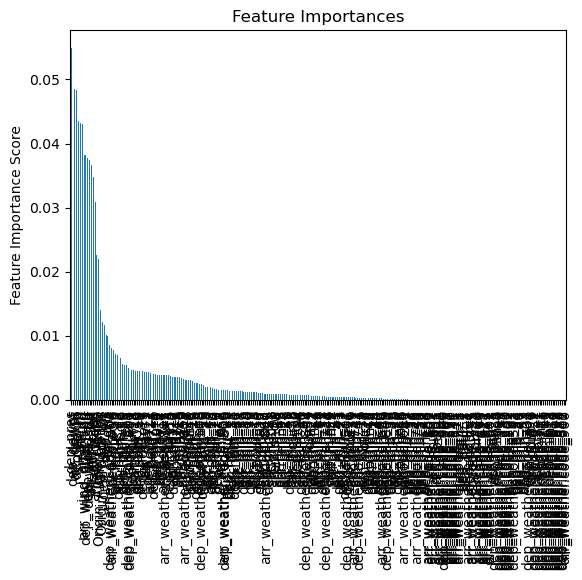

<Figure size 2000x1000 with 0 Axes>

In [46]:
rf = RandomForestClassifier(random_state=50, min_samples_leaf = 6, max_features = "sqrt", n_estimators = 100)

rf = rf.fit(X_train, y_train) 
rf.score(X_train, y_train) 

# rf.feature_importances_
feat_imp = pd.Series(rf.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_Y'])

test_output.head()
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Fraction of correct classification ')
rf.score(X_test, y_test) 

In [47]:
# gb = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 300)

# gb = gb.fit(X_train, y_train) 
# gb.score(X_train, y_train) 

In [48]:
# linear_reg_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
# linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
# linear_reg_output.head(20)
# gb.score(X_test,y_test)

In [49]:
arr_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [50]:
su_data.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [51]:
su_data.dtypes

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
arr_status              int32
dep_status              int32
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: obj

In [52]:
su_data['dep_status']= pd.Categorical(su_data['dep_status'], categories = [0,1,2])

In [53]:
su_data.dtypes
su_data.columns

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
arr_status              int32
dep_status           category
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: obj

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [54]:
su_data = pd.get_dummies(su_data, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
su_data.head()
# su_data.dtypes
# su_data.columns

,arr_status,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,1,100,-2.80,0.00,989,88,0.00,-1.10,11,320,...,False,False,False,False,False,False,False,False,False,False
1,2,100,-1.20,0.25,985,96,8.50,-0.60,2,20,...,False,False,False,False,False,False,False,False,False,False
2,2,100,-0.30,0.25,985,92,4.00,0.80,6,255,...,False,False,False,False,False,False,False,False,False,False
3,0,100,-2.00,0.00,984,73,0.00,2.40,16,255,...,False,False,False,False,False,False,False,False,True,False
4,0,100,-6.30,0.00,995,56,0.00,1.60,16,235,...,False,False,False,False,False,False,False,False,True,False


In [55]:
X_train, X_test, y_train, y_test = train_test_split(su_data.drop(columns = ['arr_status']), su_data['arr_status'],stratify = su_data['arr_status'], test_size=0.2, random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train.dtypes
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4212,87,11.10,0.00,1027,76,0.00,15.30,16,155,10.00,...,False,False,False,False,False,False,False,False,True,False
3356,25,6.60,0.00,1024,58,0.00,14.80,16,330,6.00,...,False,False,False,False,False,False,False,False,True,False
7366,25,16.90,0.00,1013,40,0.00,32.20,16,180,8.80,...,False,False,False,False,False,False,False,False,True,False
151,95,23.50,16.00,985,62,0.00,31.70,16,185,19.50,...,False,False,False,False,False,False,False,False,True,False
4874,100,17.70,0.00,1008,90,0.00,19.40,16,140,10.00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,43,-10.70,0.00,1029,42,0.00,0.70,16,280,8.50,...,False,False,False,False,False,False,False,True,False,False
7727,25,-8.10,0.00,1015,26,0.00,10.60,16,310,12.40,...,False,False,False,False,False,False,True,False,False,False
301,40,20.70,0.00,985,75,0.00,25.40,16,175,10.40,...,False,False,False,False,False,False,False,True,False,False
2076,87,4.00,0.00,993,23,0.00,26.90,16,100,6.00,...,False,False,False,False,False,False,False,True,False,False


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
5077,100,8.30,0.00,1006,77,0.00,12.20,16,350,12.20,...,False,False,False,False,False,False,False,False,True,False
4929,100,12.10,0.00,1021,93,0.00,13.30,5,35,8.40,...,False,False,False,False,False,False,False,False,True,False
6164,59,-13.40,0.00,1025,36,0.00,-0.10,16,330,5.55,...,False,False,False,False,False,False,False,False,True,False
316,87,6.00,0.00,990,67,0.00,12.00,16,325,11.40,...,False,False,False,False,False,False,False,False,False,False
8344,50,16.40,0.00,1016,50,0.00,27.80,16,60,4.40,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,0,-3.60,0.00,990,25,0.00,16.40,16,60,7.20,...,False,False,False,False,False,False,True,False,False,False
6260,78,-5.40,0.00,1014,44,0.00,5.90,16,310,12.00,...,False,False,False,False,False,False,False,False,True,False
6959,78,10.60,0.00,1006,69,0.00,16.30,16,235,8.00,...,False,False,False,False,False,False,False,False,True,False
5651,78,20.50,0.00,1013,72,0.00,26.00,16,250,4.00,...,False,False,False,False,False,False,True,False,False,False


dtype('int32')

5077    1
4929    0
6164    0
316     2
8344    2
       ..
2045    0
6260    2
6959    0
5651    2
6051    0
Name: arr_status, Length: 1681, dtype: int32

In [56]:
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
X_train = pd.DataFrame(sc2.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc2.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train
X_test
y_train
y_test

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
4212,0.63,0.33,-0.08,1.44,0.69,-0.06,-0.02,0.31,-0.40,0.72,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.82,0.00
3356,-1.35,-0.12,-0.08,1.21,-0.26,-0.06,-0.07,0.31,1.39,-0.49,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.82,0.00
7366,-1.35,0.91,-0.08,0.40,-1.21,-0.06,1.72,0.31,-0.15,0.35,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.82,0.00
151,0.89,1.57,1.51,-1.69,-0.05,-0.06,1.67,0.31,-0.09,3.59,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.82,0.00
4874,1.05,0.99,-0.08,0.02,1.43,-0.06,0.40,0.31,-0.56,0.72,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,-1.21,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,-0.78,-1.85,-0.08,1.59,-1.11,-0.06,-1.53,0.31,0.88,0.26,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.51,-1.21,0.00
7727,-1.35,-1.59,-0.08,0.55,-1.95,-0.06,-0.50,0.31,1.18,1.44,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.57,-0.40,-1.21,0.00
301,-0.87,1.29,-0.08,-1.69,0.64,-0.06,1.02,0.31,-0.20,0.84,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.51,-1.21,0.00
2076,0.63,-0.38,-0.08,-1.09,-2.11,-0.06,1.18,0.31,-0.97,-0.49,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,2.51,-1.21,0.00


,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
5077,1.05,0.05,-0.08,-0.12,0.74,-0.06,-0.34,0.31,1.59,1.38,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.82,0.00
4929,1.05,0.43,-0.08,0.99,1.59,-0.06,-0.23,-3.57,-1.63,0.23,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.82,0.00
6164,-0.27,-2.12,-0.08,1.29,-1.43,-0.06,-1.61,0.31,1.39,-0.63,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.82,0.00
316,0.63,-0.18,-0.08,-1.31,0.21,-0.06,-0.36,0.31,1.34,1.14,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,-1.21,0.00
8344,-0.55,0.86,-0.08,0.62,-0.69,-0.06,1.27,0.31,-1.37,-0.98,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.82,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,-2.16,-1.14,-0.08,-1.31,-2.01,-0.06,0.09,0.31,-1.37,-0.13,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.57,-0.40,-1.21,0.00
6260,0.34,-1.32,-0.08,0.47,-1.00,-0.06,-0.99,0.31,1.18,1.32,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.82,0.00
6959,0.34,0.28,-0.08,-0.12,0.32,-0.06,0.08,0.31,0.42,0.11,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,-0.39,-0.40,0.82,0.00
5651,0.34,1.27,-0.08,0.40,0.48,-0.06,1.08,0.31,0.57,-1.10,...,-0.09,0.00,-0.07,0.00,-0.19,-0.03,2.57,-0.40,-1.21,0.00


4212    1
3356    0
7366    1
151     0
4874    0
       ..
3785    0
7727    0
301     2
2076    2
7121    0
Name: arr_status, Length: 6724, dtype: int32

5077    1
4929    0
6164    0
316     2
8344    2
       ..
2045    0
6260    2
6959    0
5651    2
6051    0
Name: arr_status, Length: 1681, dtype: int32

In [57]:
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
model2 = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'l2',C = 1.0, max_iter = 1000)
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = None, max_iter = 1000)
#model = LinearRegression(fit_intercept = True)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 10000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

model2.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model2.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model2.coef_

# This is the coefficient Beta_0
model2.intercept_

LogisticRegression(max_iter=1000, multi_class='ovr')

0.7395895300416419

array([[-4.29008558e-02,  7.09528182e-01, -6.34500160e-01,
        -2.30854647e-03, -3.45073559e-01, -5.00298308e-01,
        -6.48993773e-01,  1.62272551e-01,  2.89390832e-02,
        -2.24781454e-01,  9.27796198e-02,  1.37161892e-01,
        -4.43870680e-01, -5.48998956e-01,  1.60928516e-02,
         5.11110815e-02,  2.74220967e-03,  4.04399683e-01,
         8.94984508e-02, -1.27565119e-01, -7.37013874e-03,
        -3.47076442e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.71326419e-01,  4.05039633e-01,  4.27815505e-01,
         3.97759525e-01,  1.91367986e-01,  1.58674485e-01,
         2.56524595e-01,  1.45273762e-01,  1.26314892e-01,
        -6.61741477e-02,  8.70688561e-02,  1.49203266e-02,
        -2.69203735e-01, -9.92422376e-02, -1.55589876e-01,
        -3.03567916e-01, -7.71797772e-01, -3.58036243e-01,
         6.89540445e-03,  1.60155933e-02, -1.73952554e-02,
        -1.70455168e-02,  5.57511783e-03, -6.86982856e-0

array([-0.20637649, -1.50972363, -1.67114619])

In [58]:
model2.score(X_test,y_test)


0.6995835812016656

In [59]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeClassifier(random_state=50, min_samples_leaf = 3)

clf = clf.fit(X_train, y_train) 
clf.score(X_train, y_train)

clf.feature_importances_
linear_reg_output = pd.DataFrame(clf.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
linear_reg_output.head(20)
clf.score(X_test, y_test)

0.9006543723973826

array([1.47759639e-02, 3.35072792e-02, 1.78891769e-03, 2.73586010e-02,
       2.72343819e-02, 1.11064848e-03, 4.11109596e-02, 4.99122736e-03,
       2.71138679e-02, 2.85766828e-02, 3.51789610e-02, 9.92090372e-03,
       1.76410111e-02, 1.14545508e-03, 2.53769249e-02, 2.56139074e-02,
       1.08687109e-03, 3.37827147e-02, 5.81014559e-03, 2.68585815e-02,
       3.42341181e-02, 2.35492772e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.54245925e-03, 1.21829573e-03, 1.65020411e-03,
       1.01112627e-04, 2.04598445e-03, 3.07229156e-03, 1.13860263e-03,
       1.02401317e-03, 6.67442956e-04, 2.20276449e-04, 4.03006041e-04,
       1.55575720e-03, 1.31892301e-03, 5.85008770e-04, 2.83572984e-03,
       0.00000000e+00, 1.32982456e-03, 0.00000000e+00, 2.61228134e-03,
       1.43645473e-03, 8.21345646e-04, 8.52953399e-04, 4.46946065e-03,
       3.37437895e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

,pred_arr_status,arr_status
5077,0,1
4929,0,0
6164,1,0
316,0,2
8344,2,2
1790,0,1
4682,0,0
2043,1,0
2633,0,0
4492,2,2


0.6168947055324212

0.7568411659726353

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

dep_status_2        0.34
dep_status_1        0.07
dep_temp            0.03
dep_dewpt           0.03
arr_rh              0.03
dep_rh              0.03
arr_dewpt           0.03
dep_pres            0.03
dep_wind_gust_spd   0.02
arr_temp            0.02
dep_wind_dir        0.02
dep_wind_spd        0.02
dtype: float64

,pred_Y
5077,0
4929,0
6164,0
316,0
8344,2


,pred_Y,arr_status
5077,0,1
4929,0,0
6164,0,0
316,0,2
8344,2,2


Fraction of correct classification 


0.7049375371802499

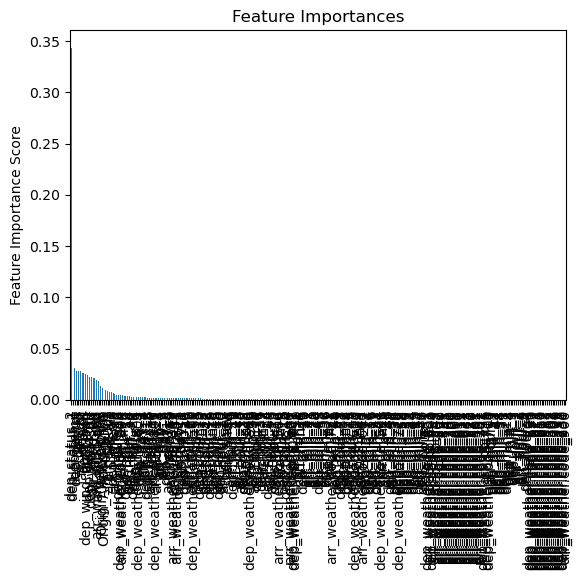

<Figure size 2000x1000 with 0 Axes>

In [60]:
rf = RandomForestClassifier(random_state=50, min_samples_leaf = 6, max_features = "sqrt", n_estimators = 100)

rf = rf.fit(X_train, y_train) 
rf.score(X_train, y_train) 

# rf.feature_importances_
feat_imp = pd.Series(rf.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(12)

test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_Y'])

test_output.head()
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Fraction of correct classification ')
rf.score(X_test, y_test) 

In [61]:
# gb = GradientBoostingClassifier(random_state=50, min_samples_split = 12, min_samples_leaf = 6, max_depth = 4, n_estimators = 300)

# gb = gb.fit(X_train, y_train) 
# gb.score(X_train, y_train) 

In [62]:
# linear_reg_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_arr_status'])
# linear_reg_output = linear_reg_output.merge(y_test, left_index = True, right_index = True)
# linear_reg_output.head(20)
# gb.score(X_test,y_test)

In [63]:
arr_data_cut = arr_data.drop(columns=['arr_status'])
arr_data_cut.dtypes
arr_data_cut.columns

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: object

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt', 'dep_precip',
       'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [64]:
arr_data_cut.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt', 'dep_precip',
       'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [65]:
arr_data_cut = arr_data_cut[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd']]

In [66]:
arr_data_cut = pd.get_dummies(arr_data_cut, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
arr_data_cut.head()
# su_data.dtypes
# su_data.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,100,-2.80,0.00,989,88,0.00,-1.10,11,320,6.80,...,False,False,False,False,False,False,False,False,False,False
1,100,-1.20,0.25,985,96,8.50,-0.60,2,20,15.90,...,False,False,False,False,False,False,False,False,False,False
2,100,-0.30,0.25,985,92,4.00,0.80,6,255,8.20,...,False,False,False,False,False,False,False,False,False,False
3,100,-2.00,0.00,984,73,0.00,2.40,16,255,10.40,...,False,False,False,False,False,False,False,False,True,False
4,100,-6.30,0.00,995,56,0.00,1.60,16,235,7.60,...,False,False,False,False,False,False,False,False,True,False


In [67]:
arr_data_cut = pd.DataFrame(sc.transform(arr_data_cut), columns = arr_data_cut.columns, index = arr_data_cut.index)

In [68]:
linear_reg_output = pd.DataFrame(model.predict(arr_data_cut), index = arr_data_cut.index, columns = ['dep_status'])
linear_reg_output = linear_reg_output.merge(arr_data, left_index = True, right_index = True)
linear_reg_output.head(20)
# mean_absolute_error = abs(linear_reg_output['pred_delay'] - linear_reg_output['arr_delay']).mean()
# print('Mean absolute error is ')
# print(mean_absolute_error)
# maer = mean_absolute_error/linear_reg_output['pred_delay'].mean()
# print('Mean absolute error ratio is ')
# print(maer)
#model.score(X_test, y_test)

,dep_status,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_status,dep_clouds,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,0,7,5,ORD,10,5,55,47,1,100,...,2.25,991,92,0.00,2.80,6,500,350,5.09,5.09
1,1,15,5,ORD,17,5,0,48,2,100,...,2.25,994,83,0.00,15.00,16,500,150,11.50,2.10
2,1,15,5,ORD,17,5,0,48,2,100,...,2.25,994,96,1.50,1.10,3,611,110,2.60,2.60
3,1,15,5,ORD,17,5,0,48,0,100,...,0.00,994,75,0.00,0.00,16,804,245,1.60,0.80
4,1,15,5,ORD,17,5,0,48,0,100,...,0.00,1009,64,0.00,-8.90,16,804,245,2.80,1.20
5,1,19,0,ORD,22,0,29,16,1,87,...,0.00,1001,40,0.00,8.90,16,804,260,4.00,3.60
6,1,15,1,ORD,17,1,6,53,0,78,...,0.00,992,25,0.00,15.00,16,804,320,6.00,4.09
7,1,15,2,ORD,17,2,6,53,1,62,...,0.00,988,66,0.00,11.10,16,804,310,7.60,3.60
8,1,15,3,ORD,17,3,6,53,1,87,...,0.00,978,38,0.00,8.90,16,804,290,18.00,13.90
9,1,15,4,ORD,17,4,6,53,1,50,...,0.00,986,64,0.00,4.40,16,804,290,11.80,7.20


In [69]:
linear_reg_output.columns

Index(['dep_status', 'dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour',
       'arr_day', 'dep_min', 'arr_min', 'arr_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [70]:
linear_reg_output.dtypes

dep_status              int32
dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
arr_status              int32
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: obj

In [71]:
linear_reg_output['dep_status']= pd.Categorical(linear_reg_output['dep_status'], categories = [0,1,2])

In [72]:
linear_reg_output = linear_reg_output[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_status', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd']]
linear_reg_output.dtypes

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
arr_status              int32
dep_status           category
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres                int64
dep_rh                  int64
dep_snow              float64
dep_temp              float64
dep_vis                 int64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres                int64
arr_rh                  int64
arr_snow              float64
arr_temp              float64
arr_vis                 int64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: obj

In [73]:
arr_data2 = linear_reg_output.drop(columns = ['arr_status'])

In [74]:
arr_data2 = pd.get_dummies(arr_data2, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
arr_data2.head()
# su_data.dtypes
# su_data.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,100,-2.80,0.00,989,88,0.00,-1.10,11,320,6.80,...,False,False,False,False,False,False,False,False,False,False
1,100,-1.20,0.25,985,96,8.50,-0.60,2,20,15.90,...,False,False,False,False,False,False,False,False,False,False
2,100,-0.30,0.25,985,92,4.00,0.80,6,255,8.20,...,False,False,False,False,False,False,False,False,False,False
3,100,-2.00,0.00,984,73,0.00,2.40,16,255,10.40,...,False,False,False,False,False,False,False,False,True,False
4,100,-6.30,0.00,995,56,0.00,1.60,16,235,7.60,...,False,False,False,False,False,False,False,False,True,False


In [75]:

arr_data2 = pd.DataFrame(sc2.transform(arr_data2), columns = arr_data2.columns, index = arr_data2.index)

In [76]:
rf.score(arr_data2,linear_reg_output['arr_status'])

0.5847709696609161

In [77]:
pred_data1 = pd.read_csv('pred_data1.csv')
pred_data1.head()
pred_data1.dtypes

,Unnamed: 0,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,arr_clouds,arr_dewpt,...,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_weather.code,dep_wind_dir,dep_wind_gust_spd,dep_wind_spd
0,0,18,4,ORD,21,4,52,47,69,8.00,...,0.00,996.50,35,0,12.70,24.00,801,280,12.50,8.40
1,2,13,4,JFK,14,4,34,51,84,7.20,...,0.00,"1,019.50",58,0,12.10,24.00,804,110,7.20,5.20
2,4,11,4,MCO,14,4,35,20,84,7.20,...,0.00,"1,015.00",58,0,28.10,24.00,801,280,2.40,2.00
3,6,18,5,ORD,21,5,52,47,23,-2.40,...,0.00,994.00,40,0,9.70,24.13,803,296,6.66,4.40
4,8,13,5,JFK,14,5,25,41,71,-1.20,...,0.00,"1,014.50",46,0,15.80,24.00,803,283,5.73,4.13


Unnamed: 0             int64
dep_hour               int64
dep_day                int64
Origin_Airport        object
arr_hour               int64
arr_day                int64
dep_min                int64
arr_min                int64
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code       int64
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code       int64
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [78]:

pred_data1['dep_min'] = pred_data1['dep_min'].astype('object')
pred_data1['arr_min'] = pred_data1['arr_min'].astype('object')
pred_data1['dep_hour'] = pred_data1['dep_hour'].astype('object')
pred_data1['dep_day'] = pred_data1['dep_day'].astype('object')
pred_data1['arr_hour'] = pred_data1['arr_hour'].astype('object')
pred_data1['arr_day'] = pred_data1['arr_day'].astype('object')
pred_data1['dep_weather.code'] = pred_data1['dep_weather.code'].astype('object')
pred_data1['arr_weather.code'] = pred_data1['arr_weather.code'].astype('object')
pred_data1.drop(columns=['Unnamed: 0'],inplace=True)
pred_data1 = pred_data1[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'arr_clouds', 'arr_dewpt',
       'arr_precip', 'arr_pres', 'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis',
       'arr_weather.code', 'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd',
       'dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_weather.code', 'dep_wind_dir',
       'dep_wind_gust_spd', 'dep_wind_spd']]

pred_data1.dtypes

dep_hour              object
dep_day               object
Origin_Airport        object
arr_hour              object
arr_day               object
dep_min               object
arr_min               object
arr_clouds             int64
arr_dewpt            float64
arr_precip           float64
arr_pres             float64
arr_rh                 int64
arr_snow               int64
arr_temp             float64
arr_vis              float64
arr_weather.code      object
arr_wind_dir           int64
arr_wind_gust_spd    float64
arr_wind_spd         float64
dep_clouds             int64
dep_dewpt            float64
dep_precip           float64
dep_pres             float64
dep_rh                 int64
dep_snow               int64
dep_temp             float64
dep_vis              float64
dep_weather.code      object
dep_wind_dir           int64
dep_wind_gust_spd    float64
dep_wind_spd         float64
dtype: object

In [79]:
pred_data1['dep_hour'] = pd.Categorical(pred_data1['dep_hour'], categories=[i for i in range(24)])
pred_data1['dep_day'] = pd.Categorical(pred_data1['dep_day'], categories=[i for i in range(7)])
pred_data1['dep_min'] = pd.Categorical(pred_data1['dep_min'], categories=[i for i in range(60)])
pred_data1['arr_hour'] = pd.Categorical(pred_data1['arr_hour'], categories=[i for i in range(24)])
pred_data1['arr_day'] = pd.Categorical(pred_data1['arr_day'], categories=[i for i in range(7)])
pred_data1['arr_min'] = pd.Categorical(pred_data1['arr_min'], categories=[i for i in range(60)])
#su_data['Carrier_Code'] = pd.Categorical(su_data['Carrier_Code'], categories=['AA', 'UA', 'DL', 'B6', 'WN'])
pred_data1['Origin_Airport'] = pd.Categorical(pred_data1['Origin_Airport'], categories=['ORD', 'JFK', 'MCO'])
pred_data1['arr_weather.code'] = pd.Categorical(pred_data1['arr_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])
pred_data1['dep_weather.code'] = pd.Categorical(pred_data1['dep_weather.code'], categories=[200,201,202,230,231,232,233,300,301,302,500,501,502,511,520,522,600,602,610,611,612,621,622,633,700,711,721,731,741,751,800,801,802,803,804,900])



In [80]:
pred_data1 = pred_data1[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt',
       'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd']]

In [81]:
pred_data1.columns

Index(['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_clouds', 'dep_dewpt', 'dep_precip',
       'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp', 'dep_vis',
       'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd', 'dep_wind_spd',
       'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres', 'arr_rh',
       'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code', 'arr_wind_dir',
       'arr_wind_gust_spd', 'arr_wind_spd'],
      dtype='object')

In [82]:
pred_data = pred_data1

In [83]:
pred_data1 = pd.get_dummies(pred_data1, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
pred_data1.head()
pred_data1.dtypes
pred_data1.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,19,-2.40,0.00,996.50,35,0,12.70,24.00,280,12.50,...,False,False,False,False,False,False,False,True,False,False
1,82,4.10,0.00,"1,019.50",58,0,12.10,24.00,110,7.20,...,False,False,False,False,False,False,False,False,True,False
2,14,19.10,0.00,"1,015.00",58,0,28.10,24.00,280,2.40,...,False,False,False,False,False,False,False,False,True,False
3,68,-3.20,0.00,994.00,40,0,9.70,24.13,296,6.66,...,False,False,False,False,False,False,True,False,False,False
4,66,4.30,0.00,"1,014.50",46,0,15.80,24.00,283,5.73,...,False,False,False,False,False,False,False,False,True,False


dep_clouds                int64
dep_dewpt               float64
dep_precip              float64
dep_pres                float64
dep_rh                    int64
                         ...   
arr_weather.code_801       bool
arr_weather.code_802       bool
arr_weather.code_803       bool
arr_weather.code_804       bool
arr_weather.code_900       bool
Length: 270, dtype: object

Index(['dep_clouds', 'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh',
       'dep_snow', 'dep_temp', 'dep_vis', 'dep_wind_dir', 'dep_wind_gust_spd',
       ...
       'arr_weather.code_721', 'arr_weather.code_731', 'arr_weather.code_741',
       'arr_weather.code_751', 'arr_weather.code_800', 'arr_weather.code_801',
       'arr_weather.code_802', 'arr_weather.code_803', 'arr_weather.code_804',
       'arr_weather.code_900'],
      dtype='object', length=270)

In [84]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
X_test = pd.DataFrame(sc.transform(pred_data1), columns = pred_data1.columns, index = pred_data1.index)


In [85]:
linear_reg_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['dep_status'])
linear_reg_output = linear_reg_output.merge(pred_data, left_index = True, right_index = True)
linear_reg_output.head(30)
# mean_absolute_error = abs(linear_reg_output['pred_delay'] - linear_reg_output['arr_delay']).mean()
# print('Mean absolute error is ')
# print(mean_absolute_error)
# maer = mean_absolute_error/linear_reg_output['pred_delay'].mean()
# print('Mean absolute error ratio is ')
# print(maer)
#model.score(X_test, y_test)

,dep_status,dep_hour,dep_day,Origin_Airport,arr_hour,arr_day,dep_min,arr_min,dep_clouds,dep_dewpt,...,arr_precip,arr_pres,arr_rh,arr_snow,arr_temp,arr_vis,arr_weather.code,arr_wind_dir,arr_wind_gust_spd,arr_wind_spd
0,1,18,4,ORD,21,4,52,47,19,-2.40,...,0.50,999.00,73,0,12.70,19.20,803,260,8.30,5.60
1,2,13,4,JFK,14,4,34,51,82,4.10,...,0.50,996.50,55,0,16.30,22.00,804,160,13.70,9.20
2,2,11,4,MCO,14,4,35,20,14,19.10,...,0.50,996.50,55,0,16.30,22.00,804,160,13.70,9.20
3,1,18,5,ORD,21,5,52,47,68,-3.20,...,0.00,998.50,53,0,6.50,24.13,802,276,8.53,5.86
4,2,13,5,JFK,14,5,25,41,66,4.30,...,0.00,"1,000.50",44,0,10.50,20.40,804,290,11.20,8.00
5,1,13,5,MCO,16,5,35,25,2,16.30,...,0.00,996.50,45,0,9.70,21.30,803,283,10.93,7.73
6,1,18,6,ORD,21,6,52,47,3,-1.40,...,0.00,996.50,46,0,8.00,24.13,801,256,12.83,8.66
7,2,13,6,JFK,14,6,35,51,64,-1.10,...,0.00,997.50,38,0,10.60,24.13,803,270,12.30,8.40
8,1,11,6,MCO,13,6,5,50,37,18.80,...,0.00,998.00,41,0,9.80,24.13,803,270,11.80,8.00
9,1,18,0,ORD,21,0,52,47,75,1.00,...,0.00,"1,003.00",43,0,7.00,24.13,801,270,6.54,4.45


In [86]:
linear_reg_output['dep_status']= pd.Categorical(linear_reg_output['dep_status'], categories = [0,1,2])

In [87]:
linear_reg_output = linear_reg_output[['dep_hour', 'dep_day', 'Origin_Airport', 'arr_hour', 'arr_day',
       'dep_min', 'arr_min', 'dep_status', 'dep_clouds',
       'dep_dewpt', 'dep_precip', 'dep_pres', 'dep_rh', 'dep_snow', 'dep_temp',
       'dep_vis', 'dep_weather.code', 'dep_wind_dir', 'dep_wind_gust_spd',
       'dep_wind_spd', 'arr_clouds', 'arr_dewpt', 'arr_precip', 'arr_pres',
       'arr_rh', 'arr_snow', 'arr_temp', 'arr_vis', 'arr_weather.code',
       'arr_wind_dir', 'arr_wind_gust_spd', 'arr_wind_spd']]
linear_reg_output.dtypes

dep_hour             category
dep_day              category
Origin_Airport       category
arr_hour             category
arr_day              category
dep_min              category
arr_min              category
dep_status           category
dep_clouds              int64
dep_dewpt             float64
dep_precip            float64
dep_pres              float64
dep_rh                  int64
dep_snow                int64
dep_temp              float64
dep_vis               float64
dep_weather.code     category
dep_wind_dir            int64
dep_wind_gust_spd     float64
dep_wind_spd          float64
arr_clouds              int64
arr_dewpt             float64
arr_precip            float64
arr_pres              float64
arr_rh                  int64
arr_snow                int64
arr_temp              float64
arr_vis               float64
arr_weather.code     category
arr_wind_dir            int64
arr_wind_gust_spd     float64
arr_wind_spd          float64
dtype: object

In [88]:
arr_data2 = pd.get_dummies(linear_reg_output, drop_first = True)
#su_data['arr_status'] = su_data['arr_status'].astype('object')
arr_data2.head()
# su_data.dtypes
# su_data.columns

,dep_clouds,dep_dewpt,dep_precip,dep_pres,dep_rh,dep_snow,dep_temp,dep_vis,dep_wind_dir,dep_wind_gust_spd,...,arr_weather.code_721,arr_weather.code_731,arr_weather.code_741,arr_weather.code_751,arr_weather.code_800,arr_weather.code_801,arr_weather.code_802,arr_weather.code_803,arr_weather.code_804,arr_weather.code_900
0,19,-2.40,0.00,996.50,35,0,12.70,24.00,280,12.50,...,False,False,False,False,False,False,False,True,False,False
1,82,4.10,0.00,"1,019.50",58,0,12.10,24.00,110,7.20,...,False,False,False,False,False,False,False,False,True,False
2,14,19.10,0.00,"1,015.00",58,0,28.10,24.00,280,2.40,...,False,False,False,False,False,False,False,False,True,False
3,68,-3.20,0.00,994.00,40,0,9.70,24.13,296,6.66,...,False,False,False,False,False,False,True,False,False,False
4,66,4.30,0.00,"1,014.50",46,0,15.80,24.00,283,5.73,...,False,False,False,False,False,False,False,False,True,False


In [89]:

arr_data2 = pd.DataFrame(sc2.transform(arr_data2), columns = arr_data2.columns, index = arr_data2.index)

In [90]:
output = pd.DataFrame(rf.predict(arr_data2), index = arr_data2.index, columns = ['arr_status'])

In [91]:
output

,arr_status
0,0
1,2
2,2
3,0
4,2
5,0
6,0
7,2
8,0
9,0
